In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt
import calendar
from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Load GJGNY dataset into a Dataframe
df = pd.read_csv("Green_Jobs_-_Green_New_York__GJGNY__Residential_Loan_Portfolio___Beginning_November_2010.csv")
df

,Reporting Period,CONTRACT DATE,SETUP DATE,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,ORIGINAL MATURITY DATE,CURRENT MATURITY DATE,INTEREST RATE,CREDIT SCORE CURRENT HIGH,CREDIT SCORE,...,ACCOUNT CODE DATE,CANCEL REASON,TYPE OF BANKRUPTCY,Months Since Origination,Payments Made,Purpose,Loan Type,Underwriting,Pledged,Georeference
0,12/31/2021,01/20/2011,01/24/2011,7920.00,60,01/20/2016,04/23/2013,3.99,790.0,790.0,...,05/17/2013,NaN,NaN,131.4,60.0,Energy Efficiency (EE),Smart Energy,Tier 1,Unpledged,POINT (-78.898159 42.948761)
1,12/31/2021,06/17/2016,06/27/2016,19169.60,180,06/17/2031,11/18/2021,3.99,754.0,753.0,...,11/19/2021,NaN,NaN,66.4,180.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-76.757158 43.096791)
2,12/31/2021,02/10/2011,02/14/2011,9892.69,120,02/10/2021,10/16/2014,3.49,722.0,722.0,...,11/21/2014,NaN,NaN,130.6,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,POINT (-78.83641 42.727748000000005)
3,12/31/2021,08/15/2011,08/19/2011,13000.00,120,08/15/2021,03/03/2021,3.49,754.0,754.0,...,03/03/2021,NaN,NaN,124.5,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,POINT (-75.762715 43.082961)
4,12/31/2021,04/26/2021,04/30/2021,16554.00,180,04/26/2036,04/26/2036,6.99,687.0,687.0,...,04/30/2021,NaN,NaN,8.1,8.0,Solar (PV),Smart Energy,Tier 1,NaN,POINT (-73.783424 42.852843)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34101,12/31/2021,04/16/2013,04/19/2013,4294.52,120,04/16/2023,08/16/2018,2.99,777.0,777.0,...,08/28/2018,NaN,NaN,104.5,120.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,POINT (-72.749509 40.93059)
34102,12/31/2021,04/24/2018,04/30/2018,18080.00,180,04/24/2033,03/16/2020,4.99,739.0,739.0,...,04/08/2020,NaN,NaN,44.2,180.0,Solar (PV),On Bill Recovery,Tier 2,Unpledged,POINT (-73.072068 40.797268)
34103,12/31/2021,11/14/2016,02/20/2020,1919.88,143,11/14/2031,04/15/2032,3.49,NaN,NaN,...,02/20/2020,NaN,NaN,61.5,14.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,POINT (-78.7594 42.928)
34104,12/31/2021,02/26/2021,03/10/2021,2570.00,180,02/28/2036,02/28/2036,6.49,731.0,685.0,...,03/10/2021,NaN,NaN,10.1,10.0,Air Source Heat Pump (ASHP),Companion,Tier 2,NaN,POINT (-73.517198 40.725845)


In [4]:
df.rename(columns={'SUCCESSOR NUMBER':'SUCCESSOR_NUMBER'}, inplace=True)
df.dtypes

Reporting Period              object
CONTRACT DATE                 object
SETUP DATE                    object
ORIGINAL LOAN AMOUNT         float64
ORIGINAL TERM                  int64
ORIGINAL MATURITY DATE        object
CURRENT MATURITY DATE         object
INTEREST RATE                float64
CREDIT SCORE CURRENT HIGH    float64
CREDIT SCORE                 float64
CREDIT SCORE NAME 2          float64
DEBT TO INCOME               float64
FIRST PAYMENT DATE            object
LAST PAYMENT DATE             object
LAST PAYMENT AMOUNT          float64
NEXT PAYMENT DUE DATE         object
PAYMENT AMOUNT               float64
CURRENT BALANCE              float64
UNAPPLIED CASH               float64
DELINQUENT AMOUNT            float64
TOTAL INTEREST PAID          float64
TOTAL LATE CHARGE PAID       float64
PAYMENTS REMAINING             int64
DAYS DELINQUENT                int64
PROPERTY COUNTY               object
UTILITY                       object
INSTALLATION CITY             object
I

In [5]:
#Make sure Setup date is in datetime format
df['SETUP DATE'] = pd.to_datetime(df['SETUP DATE'])

# Create a column that holds each month
df['SETUP_MONTH'] = pd.to_datetime(df['SETUP DATE'], format="%Y%m") + MonthEnd(1)

#Create a column that holds each year
df['SETUP_YEAR'] = df['SETUP DATE'].dt.year


#Get working dates for graphs
most_recent_date = df['SETUP_MONTH'].max() #Get the most recent date on the
three_years_prior_date = most_recent_date + relativedelta(years=-3) #Get the date of the past 3 years
assisted_date = pd.Timestamp('2016-09-01')
most_recent_date, three_years_prior_date, assisted_date

(Timestamp('2021-12-31 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2016-09-01 00:00:00'))

In [6]:
df.Purpose.unique()

array(['Energy Efficiency (EE)', 'Solar (PV)',
       'Air Source Heat Pump (ASHP)', 'Ground Source Heat Pump (GSHP)',
       'Renewable Heat NY (RHNY)', 'Solar Thermal'], dtype=object)

In [7]:
df.SETUP_YEAR.unique()

array([2011, 2016, 2021, 2012, 2020, 2017, 2019, 2013, 2014, 2015, 2018,
       2010], dtype=int64)

## Create a residential loan summary based on loan type

<AxesSubplot:>

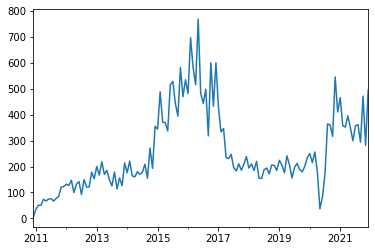

In [8]:
#Plot all loans over time
(df.loc[df['SETUP DATE'].dt.year.between(2010, 2022), 'SETUP DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

<AxesSubplot:>

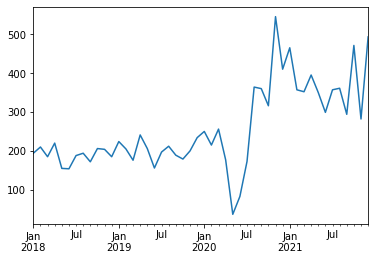

In [9]:
#Plot all loans over the last 3 years

(df.loc[df['SETUP DATE'].dt.year.between(2018, 2021), 'SETUP DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

In [10]:
#Create dataframes for each loan purpose
EE_loans_df = df[(df["Purpose"] == 'Energy Efficiency (EE)')]
PV_loans_df = df[(df["Purpose"] == 'Solar (PV)')]
ASHP_loans_df = df[(df["Purpose"] == 'Air Source Heat Pump (ASHP)')]
GSHP_loans_df = df[(df["Purpose"] == 'Ground Source Heat Pump (GSHP)')]
RHNY_loans_df = df[(df["Purpose"] == 'Renewable Heat NY (RHNY)')]
ST_loans_df = df[(df["Purpose"] == 'Solar Thermal')]


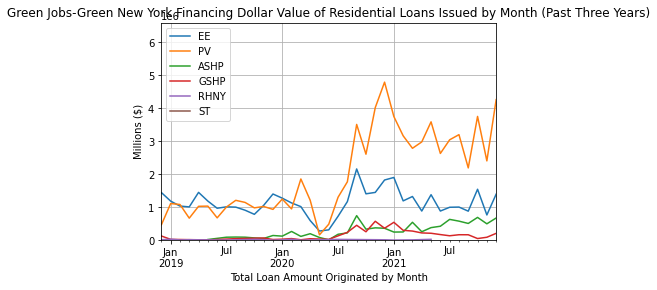

In [11]:
#create data by grouping on month and summing loan amounts
EE_loans_month = EE_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
PV_loans_month = PV_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
ASHP_loans_month = ASHP_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
GSHP_loans_month = GSHP_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
RHNY_loans_month = RHNY_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
ST_loans_month = ST_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)

#Set figure Size and plot
ax = plt.gca()
EE_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
PV_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
ASHP_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
GSHP_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
RHNY_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
ST_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )

#Add legend
ax.legend(["EE", "PV","ASHP", "GSHP","RHNY", "ST"]);

#Label axis
ax.set_xlabel("Total Loan Amount Originated by Month")
ax.set_ylabel("Millions ($)")

#Set Axis limits
plt.gca().set_xlim(left=three_years_prior_date)
plt.gca().set_ylim(bottom=0)

#Add a title.
ax.set_title("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Month (Past Three Years)")

# Add a grid.
ax.grid()


## Create stacked graph for loan purposes (sum of dollars)

In [12]:
#Create groupby year and purpose
df_gb_loan_amt = (df.groupby(['SETUP_YEAR','Purpose'])
         ['ORIGINAL LOAN AMOUNT'].sum()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_amt = (df_gb_loan_amt.pivot(index= 'SETUP_YEAR',
                     columns='Purpose',
                     values='ORIGINAL LOAN AMOUNT'))

#Remove all Nan values so that columns can be summed
df_piv_loan_amt = df_piv_loan_amt.fillna(0)

#Combine all solar purposes
df_piv_loan_amt['All PV'] = df_piv_loan_amt["Solar (PV)"] + df_piv_loan_amt["Solar Thermal"]


#combine all 'other' purposes in one column
df_piv_loan_amt['Other'] = df_piv_loan_amt["Air Source Heat Pump (ASHP)"] + df_piv_loan_amt["Ground Source Heat Pump (GSHP)"] + df_piv_loan_amt["Renewable Heat NY (RHNY)"]


#drop unneccessary columns
df_piv_loan_amt.drop(["Solar (PV)",
             "Solar Thermal",
             "Air Source Heat Pump (ASHP)",
             "Ground Source Heat Pump (GSHP)",
             "Renewable Heat NY (RHNY)"],
            axis=1,
            inplace= True)


In [13]:
#Create dataframe holding average interest rate by year
df_gb_ir = (df.groupby(['SETUP_YEAR'])
         ['INTEREST RATE'].mean()
         .reset_index())

<AxesSubplot:>

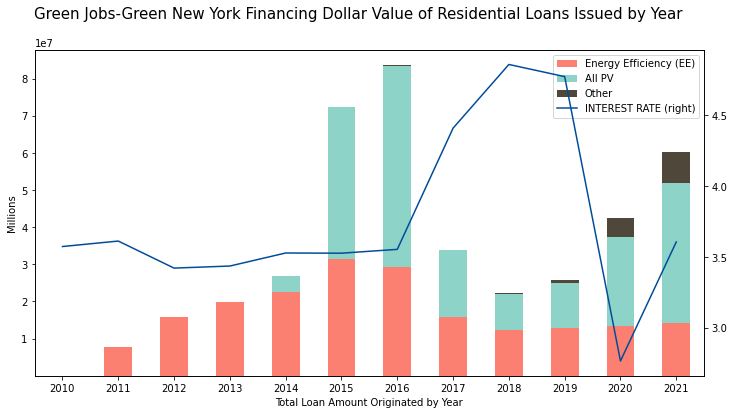

In [14]:
#Create subplot
fig, ax1= plt.subplots()

#add title
fig.suptitle("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Year", fontsize=15)


#Choose colors for purpose
colors ={'Energy Efficiency (EE)':'#fb8072',
        'All PV':'#8dd3c7',
        'Other':'#4f483a'}

#plot bars
df_piv_loan_amt.plot(ax=ax1,
            kind='bar', 
            stacked=True, 
            figsize=(12,6),
            color=colors,
            ylabel= "Millions",
            xlabel="Total Loan Amount Originated by Year").legend(loc='best')

#plot line
df_gb_ir.plot(y= 'INTEREST RATE',
              ax=ax1,
              kind='line',
              sharex=True,
             secondary_y=True,
              ylim = 6,
              color = '#004C99'
             )

## Create stacked graph for loan purposes (loan count)

In [46]:
#Remove successors from dataframe
df_suc_rem = df[df["SUCCESSOR_NUMBER"].str.contains("S-0|s-0", 
                                                 na=True, 
                                                 case= False
                                                )]

#Create groupby year and purpose
df_gb_loan_cnt = (df_suc_rem_inc_rep.groupby(['SETUP_MONTH','Purpose'])
         ['ORIGINAL LOAN AMOUNT'].count()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_cnt = (df_gb_loan_cnt.pivot(index= 'SETUP_MONTH',
                     columns='Purpose',
                     values='ORIGINAL LOAN AMOUNT'))

#Remove all Nan values so that columns can be summed
df_piv_loan_cnt = df_piv_loan_cnt.fillna(0)

#Combine all solar purposes
df_piv_loan_cnt['All PV'] = df_piv_loan_cnt["Solar (PV)"] + df_piv_loan_cnt["Solar Thermal"]


#combine all 'other' purposes in one column
df_piv_loan_cnt['Other'] = df_piv_loan_cnt["Air Source Heat Pump (ASHP)"] + df_piv_loan_cnt["Ground Source Heat Pump (GSHP)"] + df_piv_loan_cnt["Renewable Heat NY (RHNY)"]


#drop unneccessary columns
df_piv_loan_cnt.drop(["Solar (PV)",
             "Solar Thermal",
             "Air Source Heat Pump (ASHP)",
             "Ground Source Heat Pump (GSHP)",
             "Renewable Heat NY (RHNY)"],
            axis=1,
            inplace= True)

#Trim dataframe to start on september 2016
df_piv_loan_cnt = df_piv_loan_cnt.loc['2016-09-01':]

#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_cnt = df_piv_loan_cnt.reset_index()
df_piv_loan_cnt['SETUP_MONTH'] = df_piv_loan_cnt['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_cnt.set_index('SETUP_MONTH', inplace=True)

df_piv_loan_cnt

Purpose,Energy Efficiency (EE),All PV,Other
SETUP_MONTH,,,
2016-09,163.0,149.0,0.0
2016-10,240.0,230.0,2.0
2016-11,259.0,281.0,1.0
2016-12,282.0,307.0,1.0
2017-01,213.0,206.0,1.0
...,...,...,...
2021-08,125.0,170.0,53.0
2021-09,112.0,119.0,47.0
2021-10,196.0,208.0,51.0


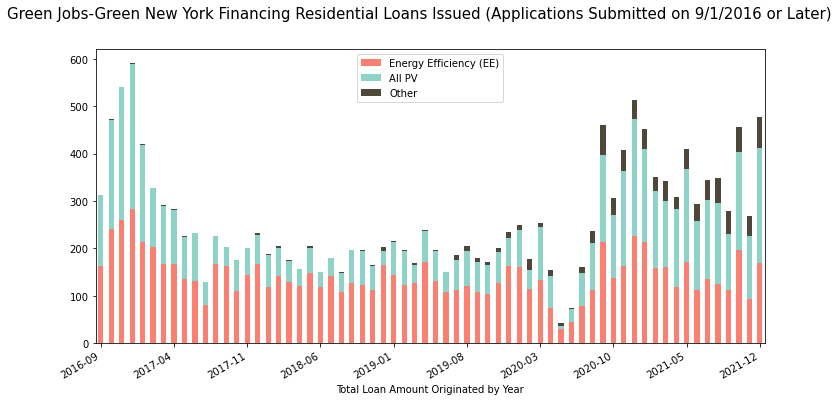

In [47]:
#Create subplot
fig, ax2= plt.subplots()

#add title
fig.suptitle("Green Jobs-Green New York Financing Residential Loans Issued (Applications Submitted on 9/1/2016 or Later)",
             fontsize=15)


#Choose colors for purpose
colors ={'Energy Efficiency (EE)':'#fb8072',
        'All PV':'#8dd3c7',
        'Other':'#4f483a'}



#PLOT EACH COLUMN SEPearately using ax2.plot()



#plot bars
df_piv_loan_cnt.plot(ax=ax2,
                     kind='bar', 
                     stacked=True,
                     figsize=(12,6),
                     color=colors,
                     xlabel="Total Loan Amount Originated by Year"
                    ).legend(loc='best')

#Rotate date labels
fig.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax2.locator_params(axis='x', nbins=10)

plt.show()

## Create quantitative graphs to view how Smart Energy Loans Compare to OBR (2 graphs, past 3 years and Program to Date)

## Create quantitative graphs to view how Tier 1 Loans Compare to Tier 2 (2 graphs, past 3 years and Program to Date)

## Create a dataframe showing a summary of all utility companies and sum of outstanding $ for all loans